<a href="https://colab.research.google.com/github/Muskanverma002/SA2025_W1-1-.-ipynb/blob/main/summer_analytics_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
uploaded = files.upload()

Saving summer-analytics-mid-hackathon.zip to summer-analytics-mid-hackathon (1).zip


In [ ]:
import zipfile
import os


zip_path = "summer-analytics-mid-hackathon.zip"


extract_folder = "hackathon_data"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("ZIP extracted successfully.")


ZIP extracted successfully.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
train_path = os.path.join("hackathon_data", "hacktrain.csv")
test_path = os.path.join("hackathon_data", "hacktest.csv")


In [ ]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


In [ ]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("\nTrain Head:")
print(train.head())

Train Shape: (8000, 30)
Test Shape: (2845, 29)

Train Head:
   Unnamed: 0  ID  class  20150720_N  20150602_N  20150517_N  20150501_N  \
0           0   1  water    637.5950     658.668   -1882.030    -1924.36   
1           1   2  water    634.2400     593.705   -1625.790    -1672.32   
2           3   4  water     58.0174   -1599.160         NaN    -1052.63   
3           4   5  water     72.5180         NaN     380.436    -1256.93   
4           7   8  water   1136.4400         NaN         NaN     1647.83   

   20150415_N  20150330_N  20150314_N  ...  20140610_N  20140525_N  \
0     997.904   -1739.990     630.087  ...         NaN   -1043.160   
1     914.198    -692.386     707.626  ...         NaN    -933.934   
2         NaN   -1564.630         NaN  ...    -1025.88     368.622   
3     515.805   -1413.180    -802.942  ...    -1813.95     155.624   
4    1935.800         NaN    2158.980  ...     1535.00    1959.430   

   20140509_N  20140423_N  20140407_N  20140322_N  20140218_N 

In [ ]:
print("\nMissing values:\n", train.isnull().sum())



Missing values:
 Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64


In [ ]:
print("Columns in Train Set:")
print(train.columns)

Columns in Train Set:
Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')


In [ ]:

drop_cols = ['Unnamed: 0', 'ID', 'class']


X = train.drop(columns=drop_cols)
y = train['class']


X_test = test.drop(columns=['Unnamed: 0', 'ID'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)


val_preds = model.predict(X_val)


print("Validation Accuracy:", accuracy_score(y_val, val_preds))


Validation Accuracy: 0.918125


In [ ]:
test_preds = model.predict(X_test)


In [ ]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'class': test_preds
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission file ready!")


✅ Submission file ready!


<ipython-input-16-51675691>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_preds, palette='Set2')


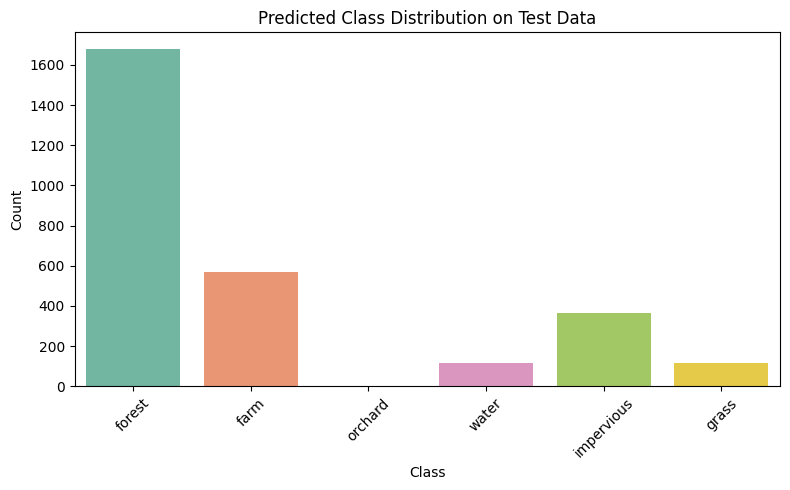

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=test_preds, palette='Set2')
plt.title("Predicted Class Distribution on Test Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print("📄 Sample Predictions:")
print(submission.head(10))


📄 Sample Predictions:
   ID   class
0   1  forest
1   2  forest
2   3  forest
3   4  forest
4   5  forest
5   6    farm
6   7  forest
7   8  forest
8   9  forest
9  10    farm


In [ ]:
import os

file_size = os.path.getsize("submission.csv") / 1024  # in KB
print(f"📁 Submission file size: {file_size:.2f} KB")


📁 Submission file size: 32.34 KB


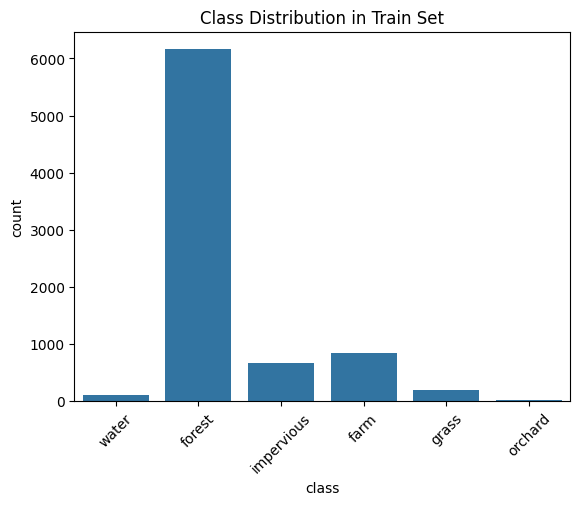

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=train)
plt.title("Class Distribution in Train Set")
plt.xticks(rotation=45)
plt.show()


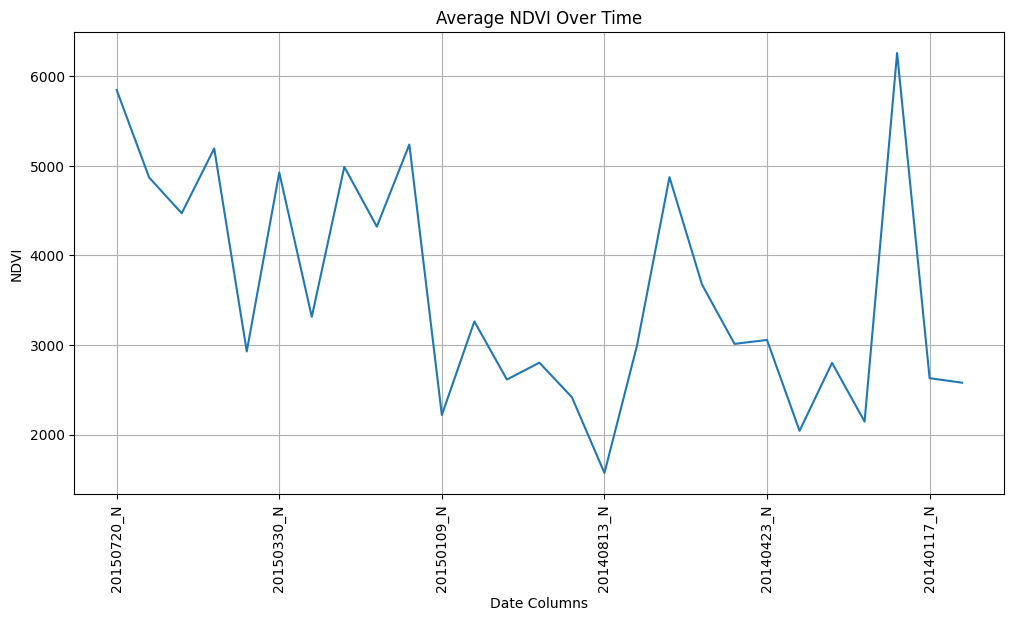

In [ ]:
ndvi_columns = [col for col in train.columns if col.endswith('_N')]
avg_ndvi = train[ndvi_columns].mean()

plt.figure(figsize=(12,6))
avg_ndvi.plot()
plt.title("Average NDVI Over Time")
plt.xlabel("Date Columns")
plt.ylabel("NDVI")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [ ]:
train = train.ffill(axis=1)
test = test.ffill(axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
train['class_encoded'] = le.fit_transform(train['class'])


label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'farm': np.int64(0), 'forest': np.int64(1), 'grass': np.int64(2), 'impervious': np.int64(3), 'orchard': np.int64(4), 'water': np.int64(5)}


In [ ]:

ndvi_columns = [col for col in train.columns if col.endswith('_N')]
X = train[ndvi_columns]
y = train['class_encoded']


X_test = test[ndvi_columns]


In [ ]:

print(X.dtypes.value_counts())
print("Non-numeric columns:", X.select_dtypes(include=['object']).columns.tolist())


object    27
Name: count, dtype: int64
Non-numeric columns: ['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']


In [ ]:

for col in ndvi_columns:
    train[col] = pd.to_numeric(train[col], errors='coerce')


for col in ndvi_columns:
    test[col] = pd.to_numeric(test[col], errors='coerce')


In [ ]:
train[ndvi_columns] = train[ndvi_columns].ffill(axis=1)
test[ndvi_columns] = test[ndvi_columns].ffill(axis=1)


In [ ]:
print(train[ndvi_columns].dtypes.value_counts())


float64    27
Name: count, dtype: int64


In [ ]:
X = train[ndvi_columns]
y = train['class']
X_test = test[ndvi_columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encode target labels


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


le = LabelEncoder()
y_encoded = le.fit_transform(y)


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_test_imputed = imputer.transform(X_test)


X_train, X_val, y_train, y_val = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


val_preds = model.predict(X_val)
print("📊 Validation Accuracy:", accuracy_score(y_val, val_preds))


test_preds_encoded = model.predict(X_test_imputed)
test_preds = le.inverse_transform(test_preds_encoded)


submission = pd.DataFrame({
    'ID': test['ID'],
    'class': test_preds
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission file updated successfully!")


📊 Validation Accuracy: 0.855625
✅ Submission file updated successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>